# Module 1 Practice: Anscombe's Quartet

In this practice, we will recreate the Anscombe's Quartet visualization using ggplot2 functionality. Following is the statistics and the graphics we have seen in the lab notebook.


<img src="../images/AnscombeStats.png">

<img src="../images/AnscombeGraph.png">

We will use the **`ggplot2`** library which has many useful functions to create nice plots and graphics. We will also use some other libraries to help with the layout. 

In [1]:
library(ggplot2)
library(gridExtra)

# First, call the data set to the workspace and display it (like in the lab notebook)

# YOUR CODE HERE #
data(anscombe)
anscombe

x1,x2,x3,x4,y1,y2,y3,y4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,8,7.24,6.13,6.08,5.25
4,4,4,19,4.26,3.10,5.39,12.50
12,12,12,8,10.84,9.13,8.15,5.56


In [2]:
# display summary statistics here 
# YOUR CODE HERE #
summary(anscombe)

       x1             x2             x3             x4           y1        
 Min.   : 4.0   Min.   : 4.0   Min.   : 4.0   Min.   : 8   Min.   : 4.260  
 1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 8   1st Qu.: 6.315  
 Median : 9.0   Median : 9.0   Median : 9.0   Median : 8   Median : 7.580  
 Mean   : 9.0   Mean   : 9.0   Mean   : 9.0   Mean   : 9   Mean   : 7.501  
 3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.: 8   3rd Qu.: 8.570  
 Max.   :14.0   Max.   :14.0   Max.   :14.0   Max.   :19   Max.   :10.840  
       y2              y3              y4        
 Min.   :3.100   Min.   : 5.39   Min.   : 5.250  
 1st Qu.:6.695   1st Qu.: 6.25   1st Qu.: 6.170  
 Median :8.140   Median : 7.11   Median : 7.040  
 Mean   :7.501   Mean   : 7.50   Mean   : 7.501  
 3rd Qu.:8.950   3rd Qu.: 7.98   3rd Qu.: 8.190  
 Max.   :9.260   Max.   :12.74   Max.   :12.500  

In [3]:
# Let's compute the correlation
sapply(1:4, function(x) cor(anscombe[, x], anscombe[, x+4]))

[1] 0.8164205 0.8162365 0.8162867 0.8165214

In [4]:
# and compute variance
sapply(5:8, function(x) var(anscombe[, x]))

[1] 4.127269 4.127629 4.122620 4.123249

In [5]:
# linear regression (first pair)
lm(y1 ~ x1, data = anscombe)


Call:
lm(formula = y1 ~ x1, data = anscombe)

Coefficients:
(Intercept)           x1  
     3.0001       0.5001  


In [6]:
# linear regression (second pair)
lm(y2 ~ x2, data = anscombe)


Call:
lm(formula = y2 ~ x2, data = anscombe)

Coefficients:
(Intercept)           x2  
      3.001        0.500  


### Now, it's your turn: Find the linear regression coefficients for the next two data sets:

In [7]:
# linear regression (next two pairs)

lm(y3 ~ x3, data = anscombe)


Call:
lm(formula = y3 ~ x3, data = anscombe)

Coefficients:
(Intercept)           x3  
     3.0025       0.4997  


In [8]:
lm(y4 ~ x4, data = anscombe)


Call:
lm(formula = y4 ~ x4, data = anscombe)

Coefficients:
(Intercept)           x4  
     3.0017       0.4999  


**Let's create a plot with x1 and y1 as the inputs and use the geom_point; it will be a scatterplot.** ggplot2 constructs the graphs in a modular way: first we define the data to be used, then the type of the plot, and then the other parameters and functionality we desire. All these can be added to the plot by using the **+** operator as below. 


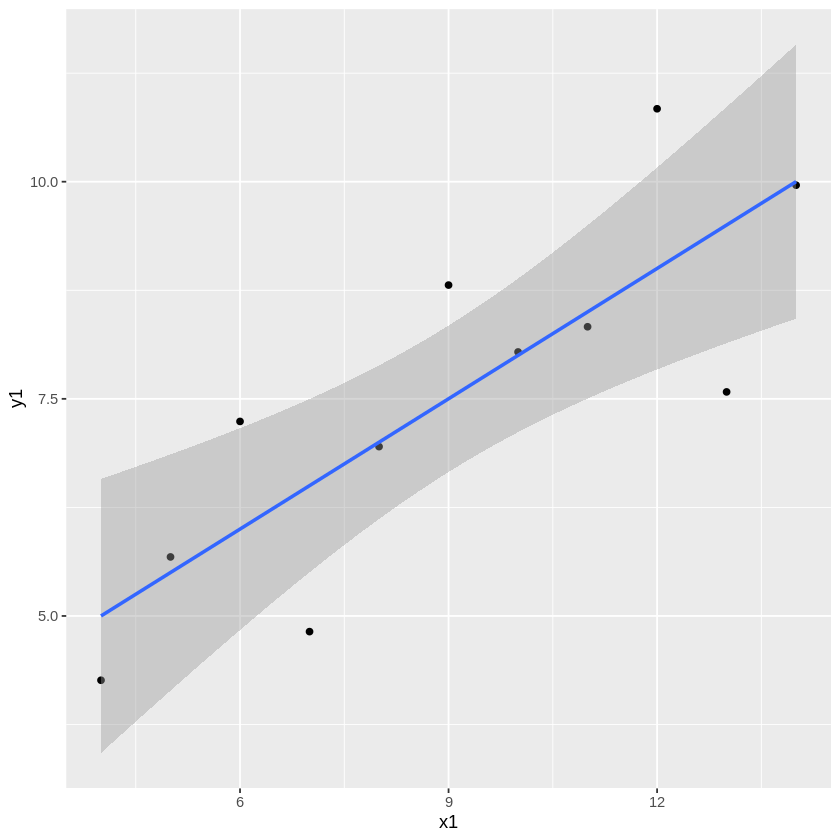

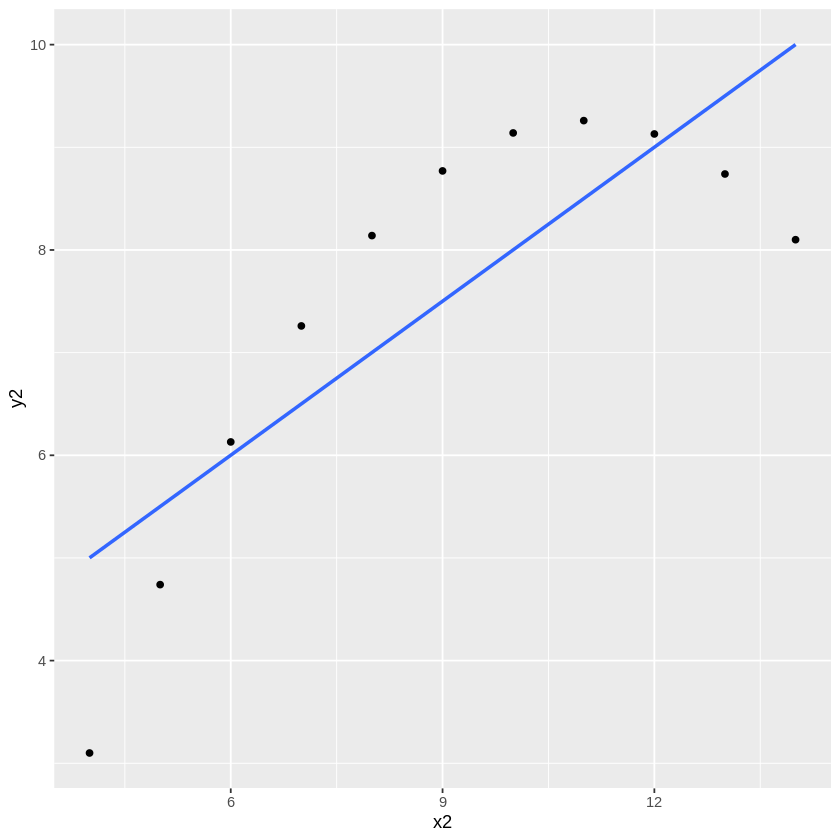

In [9]:
# Inputs: x1 and y1. Use the geom_point to make it a scatterplot. 

p1 <- ggplot(anscombe, aes(x=x1, y=y1)) + geom_point() 

# add a linear regression line and set minimum x,y limits on the plot
p1 <- p1 + geom_smooth(method = lm) + expand_limits(x = 7, y = 7)
p1

# Now, let's do the same for x2,y2; we can remove the confidence interval with se=FALSE 
p2 <- ggplot(anscombe, aes(x=x2, y=y2)) + geom_point() 
p2 <- p2 + geom_smooth(method = lm, se = FALSE) + expand_limits(x = 7, y = 7)
p2

### Now, it's your turn: create the plots for x3,y3 and x4,y4 in similar way as above :

In [10]:
p3 <- <--YOUR CODE HERE-->

p3 <- p3 + <--YOUR CODE HERE-->
p3

p4 <- <--YOUR CODE HERE-->

p4 <- p4 + <--YOUR CODE HERE-->
p4

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected assignment
1: p3 <- <-
          ^


In [ ]:
# Now, we plot them as a grid using the grid.arrange 
grid.arrange(p1, p2, p3, p4)

**`ggplot2` has many ways of manipulating the plot. Let's try to make our plots look very close to the original picture above.** 

In [ ]:
# This is another way of drawing the scatterplot in order to make it look very close to our original graph. 

# change color and size of the marker
pp1 <- ggplot(anscombe) + geom_point(aes(x1, y1), color = "darkorange", size = 3) 

# add black and white theme
pp1 <- pp1 + theme_bw()

# adjust the limits on the axes
pp1 <- pp1 + scale_x_continuous(breaks = seq(0, 18, 2)) + scale_y_continuous(breaks = seq(0, 12, 2)) 

# draw a line with an intercept and slope -- see the difference from above
pp1 <- pp1 + geom_abline(intercept = 3, slope = 0.5, color = "cornflowerblue") 

# more axis stuff
pp1 <- pp1 + expand_limits(x = c(4,18), y = c(4,12)) 

# and add a title 
pp1 <- pp1 + labs(title = "dataset 1")
pp1

### Again, it's your turn: create the rest of the plots: 

In [ ]:
pp2 <- ggplot(anscombe) + <--YOUR CODE HERE-->
pp2 <- pp2 + theme_bw() 
pp2 <- pp2 + scale_x_continuous(breaks = seq(0, 18, 2)) + scale_y_continuous(breaks = seq(0, 12, 2)) 
pp2 <- pp2 + geom_abline(intercept = 3, slope = 0.5, color = "cornflowerblue") 
pp2 <- pp2 + expand_limits(x = c(4,18), y = c(4,12)) 
pp2 <- pp2 + <--YOUR CODE HERE-->

In [ ]:
pp3 <- <--YOUR CODE HERE-->

pp4 <- <--YOUR CODE HERE-->

grid.arrange(pp1, pp2, pp3, pp4)

**In the coming labs and practices, we will learn how to manipulate different types of visualizations (plots, bar charts, histograms, etc.) using ggplot2.**